In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

Use yfinance (yfinance-0.2.27) for inflation data

In [16]:
import yfinance as yf

In [2]:
coaches = ['Jimbo Fisher', 'Kevin Sumlin', 'Mike Sherman', 'Dennis Franchione', 'RC Slocum', 'Jackie Sherrill', 'Tom Wilson', 'Emory Bellard', 'Gene Stallings', 'Henry Foldberg', 'James A Myers', 'Bear Bryant', 'Raymond George']

In [3]:
salaries = {'Jimbo Fisher': 9e6, 
            'Kevin Sumlin': 5e6, 
            'Mike Sherman': 2e6, 
            'Dennis Franchione': 2e6,
            'RC Slocum': 1e6,
            'Jackie Sherrill': 2.4e5,
            'Tom Wilson': 90e3, 
            'Emory Bellard': np.nan,
            'Gene Stallings': np.nan, 
            'Henry Foldberg': np.nan,
            'James A Myers': np.nan, 
            'Bear Bryant': 17.5e3, # for post-TAMU salary 
            'Raymond George': np.nan,
            }

In [4]:
salary_source = {'Jimbo Fisher': 'https://collegefootballnetwork.com/jimbo-fisher-salary-contract-net-worth/', 
            'Kevin Sumlin': 'https://www.texastribune.org/2017/11/27/texas-am-kevin-sumlin-entitled-10-million-buyout-after-his-firing/', 
            'Mike Sherman': 'https://sports.usatoday.com/ncaa/salaries/football/coach/153', 
            'Dennis Franchione': 'https://sports.usatoday.com/ncaa/salaries/football/coach/999321',
            'RC Slocum': 'https://www.myplainview.com/news/article/Slocum-fired-as-A-M-head-coach-9009432.php',
            'Jackie Sherrill': ['https://vault.si.com/vault/1982/02/01/jackie-hits-the-jackpot', 'https://www.washingtonpost.com/archive/sports/1982/05/24/bryants-450000-tops-us-coaches/1b13cfe5-b766-4dcc-b1a6-f058796f3936/'],
            'Tom Wilson': 'https://vault.si.com/vault/1982/02/01/jackie-hits-the-jackpot', 
            'Emory Bellard': '',
            'Gene Stallings': '', 
            'Henry Foldberg': '',
            'James A Myers': '', 
            'Bear Bryant': 'https://news.google.com/newspapers?id=eWUeAAAAIBAJ&sjid=5JkEAAAAIBAJ&dq=coach+bryant&pg=6621,521227&hl=en', 
            'Raymond George': '',
            }

In [5]:
start_years = {'Jimbo Fisher': 2018, 
            'Kevin Sumlin': 2012, 
            'Mike Sherman': 2008, 
            'Dennis Franchione': 2003,
            'RC Slocum': 1989,
            'Jackie Sherrill': 1982,
            'Tom Wilson': 1978, 
            'Emory Bellard': 1972,
            'Gene Stallings': 1965, 
            'Henry Foldberg': 1962,
            'James A Myers': 1958, 
            'Bear Bryant': 1954, 
            'Raymond George': 1951,
            }

In [32]:
coach_data_df = pd.DataFrame(coaches).rename(columns={0: 'Coach'})

In [33]:
coach_data_df['salary'] = coach_data_df['Coach'].apply(lambda x: salaries[x])
coach_data_df['start_year'] = coach_data_df['Coach'].apply(lambda x: start_years[x])
coach_data_df['salary_source'] = coach_data_df['Coach'].apply(lambda x: salary_source[x])

In [35]:
coach_data_df

,Coach,salary,start_year,salary_source
0,Jimbo Fisher,9000000.0,2018,https://collegefootballnetwork.com/jimbo-fishe...
1,Kevin Sumlin,5000000.0,2012,https://www.texastribune.org/2017/11/27/texas-...
2,Mike Sherman,2000000.0,2008,https://sports.usatoday.com/ncaa/salaries/foot...
3,Dennis Franchione,2000000.0,2003,https://sports.usatoday.com/ncaa/salaries/foot...
4,RC Slocum,1000000.0,1989,https://www.myplainview.com/news/article/Slocu...
5,Jackie Sherrill,240000.0,1982,[https://vault.si.com/vault/1982/02/01/jackie-...
6,Tom Wilson,90000.0,1978,https://vault.si.com/vault/1982/02/01/jackie-h...
7,Emory Bellard,NaN,1972,
8,Gene Stallings,NaN,1965,
9,Henry Foldberg,NaN,1962,


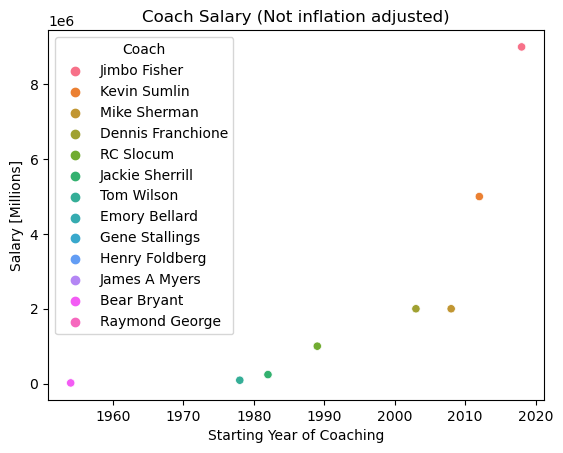

In [15]:
sns.scatterplot(coach_data_df, x='start_year', y='salary', hue='Coach')
plt.ylabel('Salary [Millions]')
plt.xlabel('Starting Year of Coaching')
plt.title('Coach Salary (Not inflation adjusted)')
plt.show()


Data from: https://data.bls.gov/timeseries/CUUR0000SA0?years_option=all_years

In [36]:
historical_cpi = pd.read_excel('CPI_index_historical.xlsx', skiprows = 11)

C:\Users\Owner\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [37]:
historical_cpi

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,1913,9.800,9.800,9.800,9.800,9.700,9.800,9.900,9.900,10.000,10.000,10.100,10.000,NaN,NaN
1,1914,10.000,9.900,9.900,9.800,9.900,9.900,10.000,10.200,10.200,10.100,10.200,10.100,NaN,NaN
2,1915,10.100,10.000,9.900,10.000,10.100,10.100,10.100,10.100,10.100,10.200,10.300,10.300,NaN,NaN
3,1916,10.400,10.400,10.500,10.600,10.700,10.800,10.800,10.900,11.100,11.300,11.500,11.600,NaN,NaN
4,1917,11.700,12.000,12.000,12.600,12.800,13.000,12.800,13.000,13.300,13.500,13.500,13.700,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2019,251.712,252.776,254.202,255.548,256.092,256.143,256.571,256.558,256.759,257.346,257.208,256.974,254.412,256.903
107,2020,257.971,258.678,258.115,256.389,256.394,257.797,259.101,259.918,260.280,260.388,260.229,260.474,257.557,260.065
108,2021,261.582,263.014,264.877,267.054,269.195,271.696,273.003,273.567,274.310,276.589,277.948,278.802,266.236,275.703
109,2022,281.148,283.716,287.504,289.109,292.296,296.311,296.276,296.171,296.808,298.012,297.711,296.797,288.347,296.963


In [39]:
coach_data_df = pd.merge(coach_data_df, historical_cpi[['Year', 'Jan']], left_on=['start_year'], right_on=['Year'])

In [42]:
coach_data_df = coach_data_df.rename(columns={'Jan': 'year_start_CPI'})

In [44]:
coach_data_df['adjusted_salary'] = coach_data_df.apply(lambda x: x['salary'] * (coach_data_df['year_start_CPI'].max()/x['year_start_CPI']), axis=1)

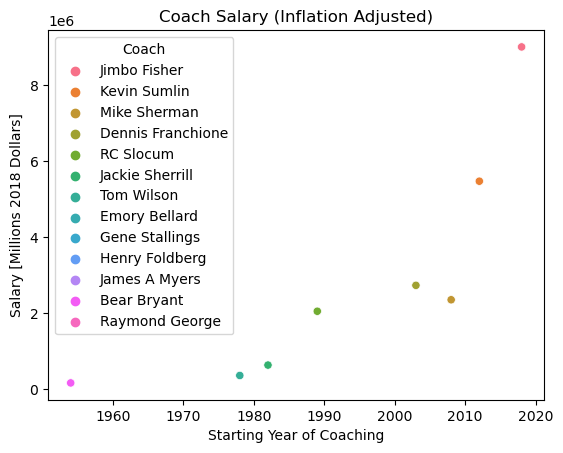

In [47]:
sns.scatterplot(coach_data_df, x='start_year', y='adjusted_salary', hue='Coach')
plt.ylabel('Salary [Millions 2018 Dollars]')
plt.xlabel('Starting Year of Coaching')
plt.title('Coach Salary (Inflation Adjusted)')
plt.show()
